[['2', '0.55', '0.46625', '0.025', '0.0175'], ['0', '0.282031', '0.46125', '0.0109375', '0.0425'], ['3', '0.361719', '0.52625', '0.0265625', '0.0575'], ['2', '0.607813', '0.46375', '0.03125', '0.0375'], ['0', '0.214062', '0.47', '0.015625', '0.06'], ['2', '0.480469', '0.46125', '0.0265625', '0.0325'], ['0', '0.932813', '0.6225', '0.125', '0.29'], ['0', '0.360938', '0.4925', '0.025', '0.095'], ['2', '0.41875', '0.45875', '0.025', '0.0325'], ['2', '0.907031', '0.51375', '0.123438', '0.1125'], ['3', '0.91875', '0.72625', '0.1625', '0.2725'], ['2', '0.791406', '0.555', '0.182812', '0.18'], ['2', '0.117188', '0.73625', '0.23125', '0.4975']]


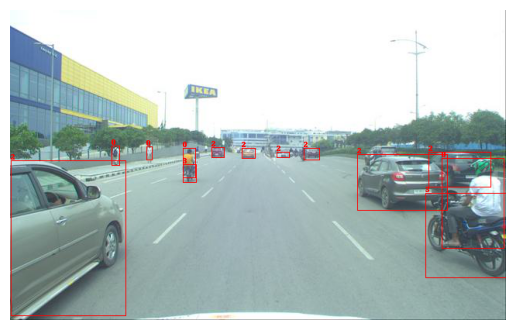

In [1]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Function to draw bounding boxes on the image
def draw_boxes(image_path, boxes):
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    for box in boxes:
        class_name, x_center, y_center, width, height = box
        x_center, y_center, width, height = float(x_center), float(y_center), float(width), float(height)

        # Convert center coordinates to top-left and bottom-right coordinates
        x1 = (x_center - (width / 2)) * image.width
        y1 = (y_center - (height / 2)) * image.height
        x2 = (x_center + (width / 2)) * image.width
        y2 = (y_center + (height / 2)) * image.height

        draw.rectangle([(x1, y1), (x2, y2)], outline="red")
        draw.text((x1, y1 - 10), class_name, fill="red")

    return image

# Path to the raw image and text file containing bounding box coordinates
image_path = "/home/radar/Documents/fusion_dataset/scene3_front/center_camera/13-19-16.728046.jpg"
text_file_path = "/home/radar/yolov5/runs/detect/exp3/labels/13-19-16.728046.txt"

# Read the bounding box coordinates from the text file
boxes = []
with open(text_file_path, 'r') as file:
    for line in file:
        box = line.strip().split()
        boxes.append(box)

# Draw bounding boxes on the image
annotated_image = draw_boxes(image_path, boxes)
print(boxes)

# Display the image with bounding boxes
plt.imshow(annotated_image)
plt.axis('off')
plt.show()

In [2]:
from PIL import Image, ImageDraw# Function to convert bounding box labels to pixel coordinates
def convert_labels_to_pixels(image_width, image_height, boxes):
    converted_boxes = []

    for box in boxes:
        class_name, x_center, y_center, width, height = box
        x_center, y_center, width, height = float(x_center), float(y_center), float(width), float(height)
        # print("image width",image_width, image_height, x_center, y_center, width, height)
        # Convert center coordinates to pixel coordinates
        x1 = int((x_center - (width / 2)) * image_width)
        y1 = int((y_center - (height / 2)) * image_height)
        x2 = int((x_center + (width / 2)) * image_width)
        y2 = int((y_center + (height / 2)) * image_height)
        # print("x1bbbbbb,u1: ",x1, y1, x2, y2)
        converted_boxes.append([class_name, x1, y1, x2, y2])
        # print("Center", x_center*image_width, y_center*image_height)

    return converted_boxes

# Example usage
# image_path = "/content/image_2023-07-05-13-26-19.297913.jpg"
# text_file_path = "/content/image_2023-07-05-13-26-19.297913.txt"

# Read image dimensions
image = Image.open(image_path)
image_width, image_height = image.size

# Read the bounding box coordinates from the text file
boxes = []
with open(text_file_path, 'r') as file:
    for line in file:
        box = line.strip().split()
        boxes.append(box)

# Convert bounding box labels to pixel coordinates
converted_boxes = convert_labels_to_pixels(image_width, image_height, boxes)

# Print the converted bounding box coordinates
for box in converted_boxes:
    print(box)

['2', 344, 183, 360, 190]
['0', 176, 176, 183, 193]
['3', 223, 199, 240, 222]
['2', 379, 178, 399, 193]
['0', 131, 175, 141, 200]
['2', 299, 178, 316, 191]
['0', 557, 191, 637, 307]
['0', 223, 178, 239, 216]
['2', 260, 177, 276, 190]
['2', 540, 183, 620, 228]
['3', 536, 236, 640, 345]
['2', 448, 186, 564, 258]
['2', 1, 194, 149, 394]


In [3]:
def get_coordinates_in_bounding_box(x_min, y_min, x_max, y_max):
    coordinates = []
    for x in range(x_min, x_max + 1):
        for y in range(y_min, y_max + 1):
            coordinates.append((x, y))
    return coordinates

# x_min, y_min, x_max, y_max = map(int, input().split())
# x_min, y_min, x_max, y_max = box[1], box[2], box[3], box[4]
coordn = []
for box in converted_boxes:
    # print(box)
    x_min, y_min, x_max, y_max = box[1], box[2], box[3], box[4]
    bounding_box_coordinates = get_coordinates_in_bounding_box(x_min, y_min, x_max, y_max)
    coordn.append(bounding_box_coordinates)
#
# bounding_box_coordinates = get_coordinates_in_bounding_box(x_min, y_min, x_max, y_max)
print(coordn)

[[(344, 183), (344, 184), (344, 185), (344, 186), (344, 187), (344, 188), (344, 189), (344, 190), (345, 183), (345, 184), (345, 185), (345, 186), (345, 187), (345, 188), (345, 189), (345, 190), (346, 183), (346, 184), (346, 185), (346, 186), (346, 187), (346, 188), (346, 189), (346, 190), (347, 183), (347, 184), (347, 185), (347, 186), (347, 187), (347, 188), (347, 189), (347, 190), (348, 183), (348, 184), (348, 185), (348, 186), (348, 187), (348, 188), (348, 189), (348, 190), (349, 183), (349, 184), (349, 185), (349, 186), (349, 187), (349, 188), (349, 189), (349, 190), (350, 183), (350, 184), (350, 185), (350, 186), (350, 187), (350, 188), (350, 189), (350, 190), (351, 183), (351, 184), (351, 185), (351, 186), (351, 187), (351, 188), (351, 189), (351, 190), (352, 183), (352, 184), (352, 185), (352, 186), (352, 187), (352, 188), (352, 189), (352, 190), (353, 183), (353, 184), (353, 185), (353, 186), (353, 187), (353, 188), (353, 189), (353, 190), (354, 183), (354, 184), (354, 185), (3

In [5]:
def check_coordinates(bounding_box_coordinates, x, y):
    for coord in bounding_box_coordinates:
        if coord[0] == x and coord[1] == y:
            return True
    return False

file_path = "points.txt"  # Replace with the actual file path
results = []

# Read input from the file
with open(file_path, "r") as file:
    input_lines = file.readlines()

# Process each line of input
for line in input_lines:
    x, y = map(int, line.strip('()\n').split(','))

    for i in range(len(coordn)):
        is_present = check_coordinates(coordn[i], int(x), int(y))
        if is_present:
            result = "({},{})".format(x, y)  # Corrected line
            results.append(result)

print(results)

with open("results.txt", "w") as output_file:
    output_file.write("\n".join(results))

['(43,319)', '(95,292)', '(620,245)', '(620,245)', '(531,233)', '(522,229)', '(32,214)', '(55,213)', '(76,211)', '(612,220)', '(612,220)', '(102,208)', '(111,207)', '(124,206)', '(6,206)', '(16,205)', '(132,205)', '(50,204)', '(52,203)', '(39,203)', '(63,203)', '(24,202)', '(74,202)', '(96,201)', '(119,201)', '(114,200)', '(611,210)', '(611,210)', '(116,200)', '(596,209)', '(596,209)', '(95,199)', '(130,199)', '(144,199)', '(144,198)', '(228,198)', '(466,202)', '(471,201)', '(537,203)', '(617,204)', '(617,204)', '(121,194)', '(599,202)', '(599,202)', '(597,202)', '(597,202)', '(599,202)', '(599,202)', '(582,201)', '(582,201)', '(487,199)', '(480,199)', '(223,194)', '(561,200)', '(561,200)', '(561,200)', '(231,194)', '(229,194)', '(551,199)', '(551,199)', '(549,199)', '(549,199)', '(139,192)', '(554,199)', '(554,199)', '(538,198)', '(542,198)', '(542,198)', '(535,198)', '(450,196)', '(533,197)', '(547,197)', '(547,197)', '(546,197)', '(546,197)', '(530,196)', '(536,196)', '(541,196)', '

In [19]:
print(len(results))

13


In [ ]:
file_path = "/content/car_3.txt"  # Replace with the actual file path
results = []

# Read input from the file
with open(file_path, "r") as file:
    input_lines = file.readlines()
# Process each line of input
box_coord1 = []

result = []
for line in input_lines:
    # Extract y and x values from the line
    x,y = line.strip().split()
    result = (int(y),int(x))
    results.append(result)
for i in range(len(coordn)):
      box_coord = []
      for a,b in coordn[i]:
        if (a,b) in results:
          box_coord.append((b,a))
      print(type(box_coord))
      box_coord1.append(str(box_coord))

with open("/content/car3_coord.txt", "w") as output_file:
  output_file.write("\n".join(box_coord1))








<class 'list'>
<class 'list'>


In [ ]:
print(len(box_coord1[0]))
print(len(box_coord1[1]))
print(box_coord1[0])
print(box_coord1[1])

577
165
[(744, 429), (744, 430), (744, 431), (744, 432), (744, 433), (744, 434), (744, 435), (744, 436), (744, 437), (744, 438), (744, 439), (744, 440), (744, 441), (744, 442), (744, 443), (744, 444), (744, 445), (744, 446), (744, 447), (744, 448), (744, 449), (744, 450), (744, 451), (744, 452), (744, 453), (744, 454), (744, 455), (744, 456), (744, 457), (744, 458), (744, 459), (744, 460), (744, 461), (744, 462), (744, 463), (744, 464), (744, 465), (762, 429), (762, 430), (762, 431), (762, 432), (762, 433), (762, 434), (762, 435), (762, 436), (762, 437), (762, 438), (762, 439), (762, 440), (762, 441), (762, 442), (762, 443), (762, 444), (762, 445), (762, 446), (762, 447), (762, 448), (762, 449), (762, 450), (762, 451), (762, 452), (762, 453), (762, 454), (762, 455), (762, 456), (762, 457), (762, 458), (762, 459), (762, 460), (762, 461), (762, 462), (762, 463), (762, 464), (762, 465), (762, 466), (762, 467), (762, 468), (762, 469), (762, 470), (762, 471), (762, 472), (762, 473), (762, 4

In [ ]:
import ast

# Read the contents of the .txt file
with open('/content/results1.txt', 'r') as file:
    file_contents = file.readlines()
# print(len(file_contents))
my_list = []
for i in range(len(file_contents)):
  my_list.append(ast.literal_eval(file_contents[i]))

print((my_list[1][0]))

(321, 453)


In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Example distances
distances = np.array([0.5, 1.2, 0.8, 1.1, 2.0, 2.3, 3.5, 4.2, 3.9, 1.8])

# Reshape distances into a 2D array
distances = distances.reshape(-1, 1)

# Perform DBSCAN clustering
#eps specifies the maximum distance between points for them to be considered in the same neighborhood
# min_samples parameter is set to 2, which specifies the minimum number of points required to form a cluster.
dbscan = DBSCAN(eps=1.0, min_samples=2)
clusters = dbscan.fit_predict(distances)

# Print the cluster labels
print(clusters)
unique_labels = np.unique(clusters)
for label in unique_labels:
    if label == -1:
        # Skip noise/outlier points
        continue
    cluster_distances = distances[clusters == label]
    print("Cluster", label, "distances:", cluster_distances)

[0 0 0 0 0 0 1 1 1 0]
Cluster 0 distances: [[0.5]
 [1.2]
 [0.8]
 [1.1]
 [2. ]
 [2.3]
 [1.8]]
Cluster 1 distances: [[3.5]
 [4.2]
 [3.9]]


In [ ]:
tuples = [('John', 25), ('Emily', 30), ('Michael', 35)]

# Open the file in write mode
with open('output.txt', 'w') as file:
    # Write each tuple with round braces to a new line in the file
    for tpl in tuples:
        line = '(' + ', '.join(map(str, tpl)) + ')\n'
        file.write(line)

In [ ]:
import numpy as np

shape = (360, 640, 11)
my_array = np.random.random(shape)

print(my_array)